<a href="https://colab.research.google.com/github/disakuz/A-B-testing/blob/main/%D0%A4%D0%BE%D1%80%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B3%D1%80%D1%83%D0%BF%D0%BF_%D0%90_B_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/A B testing/Netology_A_B-testing_HW_1.csv')

In [ ]:
df.head()

,Unnamed: 0,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
0,0,2020-05-21,867689,12,1,1,1,no surge,1,0,20,iOS,0,business,7.982135,low
1,1,2020-05-23,752172,5,1,1,1,no surge,1,0,37,Android,1,economy,2.908468,high
2,2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low
3,3,2020-05-19,304024,0,1,1,1,no surge,1,0,59,Android,1,economy,1.874349,low
4,4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium


#Если Comfort & Business классы, то более низкие юзерские отмены, более длинные поездки

###Если для пользователей класса эконом, в случае, когда они хотят отменить заказ, сделать всплывающее окно с предложением скидки - 10%,то количество отмен в классе эконом снизится на 20%.
###Бизнес цель: увеличение выручки
###Генеральная совокупность: пользователи класса эконом
###Первичная метрика: количество юзерских отмен
###Вторичная метрика: средний чек на пользователя


In [ ]:
df = df.drop('Unnamed: 0',1)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
0,2020-05-21,867689,12,1,1,1,no surge,1,0,20,iOS,0,business,7.982135,low
1,2020-05-23,752172,5,1,1,1,no surge,1,0,37,Android,1,economy,2.908468,high
2,2020-05-20,486559,15,1,1,1,no surge,1,0,47,Android,0,comfort,7.224614,low
3,2020-05-19,304024,0,1,1,1,no surge,1,0,59,Android,1,economy,1.874349,low
4,2020-05-23,139420,0,1,1,1,no surge,1,0,19,Android,0,business,10.704778,medium


In [ ]:
df.describe()

,user_id,hour,app_opened,price_seen,order_made,ride_completed,user_cancelled,age,city_center_order,distance
count,101500.000000,101500.000000,101500.0,101500.000000,101500.000000,101500.000000,101500.000000,101500.000000,101500.000000,91431.000000
mean,549874.802207,11.481429,1.0,0.900798,0.731389,0.620365,0.111025,40.471764,0.571675,5.371152
std,258600.104176,6.917522,0.0,0.298934,0.443239,0.485299,0.314164,13.536322,0.494838,4.118531
min,100093.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.010946
25%,328223.000000,5.000000,1.0,1.000000,0.000000,0.000000,0.000000,29.000000,0.000000,2.438335
50%,548827.000000,11.000000,1.0,1.000000,1.000000,1.000000,0.000000,40.000000,1.000000,4.279565
75%,773051.000000,17.000000,1.0,1.000000,1.000000,1.000000,0.000000,52.000000,1.000000,7.129814
max,999978.000000,23.000000,1.0,1.000000,1.000000,1.000000,1.000000,69.000000,1.000000,40.268966


In [ ]:
df['distance'].unique()

array([7.98213478, 2.90846839, 7.22461417, ..., 6.62422476, 8.8251881 ,
       0.88217231])

In [ ]:
df['distance'].fillna(0,inplace=True)

In [ ]:
df.describe()

,user_id,hour,app_opened,price_seen,order_made,ride_completed,user_cancelled,age,city_center_order,distance
count,101500.000000,101500.000000,101500.0,101500.000000,101500.000000,101500.000000,101500.000000,101500.000000,101500.000000,101500.000000
mean,549874.802207,11.481429,1.0,0.900798,0.731389,0.620365,0.111025,40.471764,0.571675,4.838323
std,258600.104176,6.917522,0.0,0.298934,0.443239,0.485299,0.314164,13.536322,0.494838,4.225826
min,100093.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,328223.000000,5.000000,1.0,1.000000,0.000000,0.000000,0.000000,29.000000,0.000000,1.867183
50%,548827.000000,11.000000,1.0,1.000000,1.000000,1.000000,0.000000,40.000000,1.000000,3.834776
75%,773051.000000,17.000000,1.0,1.000000,1.000000,1.000000,0.000000,52.000000,1.000000,6.675467
max,999978.000000,23.000000,1.0,1.000000,1.000000,1.000000,1.000000,69.000000,1.000000,40.268966


In [ ]:
df_cancel = df[df['user_cancelled'] == 1]
df_cancel.head()

,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
22,2020-05-21,667749,5,1,1,1,no surge,0,1,53,Android,1,business,5.612632,medium
27,2020-05-21,654038,18,1,1,1,no surge,0,1,48,Android,0,economy,7.470499,low
48,2020-05-23,732720,14,1,1,1,no surge,0,1,46,Android,0,economy,6.110571,low
57,2020-05-21,376141,9,1,1,1,surge,0,1,32,Android,1,economy,2.640953,low
79,2020-05-22,317225,5,1,1,1,surge,0,1,41,Android,1,comfort,5.642499,high


In [ ]:
# Посмотрим количество отмен заказов в разрезе классов авто
df_class = df_cancel[[ 'user_cancelled','order_class']].groupby('order_class').sum()
df_class.head()

,user_cancelled
order_class,
business,1011
comfort,4049
economy,6209


Сформируем группу клиентов. которые отменили заказ в классе авто эконом

In [ ]:
df_econom=df.loc[(df['order_class']=='economy')].groupby(['user_id'])['user_cancelled'].count().reset_index()
df_econom.head()

,user_id,user_cancelled
0,100093,2
1,100118,3
2,100134,2
3,100166,4
4,100255,3


In [ ]:
df_econom['random_values']=np.random.uniform(0,1,size=len(df_econom['user_id']))

In [ ]:
def group_random(row):
  if row['random_values']> 0.5:
    return (1)
  else:
    return (2)

In [ ]:
df_econom['group'] = df_econom.apply(group_random,axis = 1)
df_econom.head()

,user_id,user_cancelled,random_values,group
0,100093,2,0.082730,2
1,100118,3,0.628912,1
2,100134,2,0.191670,2
3,100166,4,0.446857,2
4,100255,3,0.877123,1


In [ ]:
df_econom_1 = df_econom.loc[df_econom['group']==1]

In [ ]:
df_econom_2 = df_econom.loc[df_econom['group']==2]

In [ ]:
len(df_econom_1)

10594

In [ ]:
len(df_econom_2)

10426

In [ ]:
group_volume=min(len(df_econom_1['user_id']),len(df_econom_2['user_id']))
group_volume

10426

In [ ]:
# необходимо обрезать первую и вторую выборку
df_econom_1=df_econom_1.iloc[0:group_volume-1]
df_econom_2=df_econom_2.iloc[0:group_volume-1]

In [ ]:
len(df_econom_1)

10425

In [ ]:
len(df_econom_2)

10425

##Проверка выборок на однородность
Н0 - Статистических различий в количестве отмен в группах нет,

Н1 - Статистические различия в количестве отмен в группах есть

In [ ]:
if abs(df_econom_1['user_cancelled'].var()/df_econom_2['user_cancelled'].var()-1)<0.25:
        Variance_equality=True
else:
        Variance_equality=False

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
alpha=0.05
stat, p = ttest_ind(df_econom_1['user_cancelled'],df_econom_2['user_cancelled'], equal_var=Variance_equality) # применяем тест Стьюдента

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1.288, p=0.198
Одинаковые распределения (не отвергаем H0)


#В период Surge видим более низкую price-to-order конверсию

###Если для пользователей делающих заказ в период Surge сделать кнопку с уведомлением о снижении цены, то конверсия price-to-order увеличится на 10%
###Бизнес цель: увеличение коверсии заказов;
###Генеральная совокупность: заказы в период Surge;
###Первичная метрика: конверсия price-to-order;
###Вторичная метрика: средний чек на пользователя;

In [ ]:
df_surge = df[df['surge'] == 'surge']


,date,user_id,hour,app_opened,price_seen,order_made,surge,ride_completed,user_cancelled,age,os,city_center_order,order_class,distance,rfm
9,2020-05-23,662775,17,1,1,1,surge,1,0,48,Android,1,comfort,4.828326,medium
10,2020-05-23,464055,20,1,1,1,surge,1,0,59,iOS,0,comfort,3.647097,high
18,2020-05-19,393096,23,1,1,0,surge,0,0,28,Android,1,comfort,2.523357,low
21,2020-05-18,103860,13,1,1,1,surge,1,0,49,iOS,1,economy,7.934002,low
24,2020-05-18,461185,21,1,1,1,surge,1,0,58,iOS,1,economy,1.590209,low


Строим таблицу конверсии price - to - order

In [ ]:
df_pto=df[['price_seen','order_made','surge',	'ride_completed', 'user_cancelled']].groupby("surge").sum()
df_pto.head()

,price_seen,order_made,ride_completed,user_cancelled
surge,,,,
no surge,59788,51363,43611,7752
surge,31643,22873,19356,3517


In [ ]:
# c2,c3 рассчитывались для интереса
df_pto['c1'] = df_pto['order_made'] / df_pto['price_seen']
df_pto['c2'] = df_pto['ride_completed'] / df_pto['order_made']
df_pto['c3'] = df_pto['user_cancelled'] / df_pto['order_made']
df_pto.head()

,price_seen,order_made,ride_completed,user_cancelled,c1,c2,c3
surge,,,,,,,
no surge,59788,51363,43611,7752,0.859085,0.849074,0.150926
surge,31643,22873,19356,3517,0.722845,0.846238,0.153762


Произведем конверсии цены в заказ для каждого пользователя в период surge

In [ ]:
df_pto_surge =df_surge.loc[(df_surge['user_cancelled']==0)].groupby(['user_id']).mean().reset_index()
df_pto_surge.head()

,user_id,hour,app_opened,price_seen,order_made,ride_completed,user_cancelled,age,city_center_order,distance
0,100093,4.0,1.0,1.0,0.5,0.5,0.0,40.0,0.5,9.090279
1,100118,8.0,1.0,1.0,1.0,1.0,0.0,30.0,0.0,10.942383
2,100134,20.0,1.0,1.0,1.0,1.0,0.0,55.0,1.0,13.714453
3,100166,8.0,1.0,1.0,1.0,1.0,0.0,35.0,0.5,4.448118
4,100255,15.0,1.0,1.0,0.0,0.0,0.0,29.0,0.5,7.102084


In [ ]:
df_pto_surge = df_pto_surge[['user_id', 'price_seen','order_made']]
df_pto_surge.head()

,user_id,price_seen,order_made
0,100093,1.0,0.5
1,100118,1.0,1.0
2,100134,1.0,1.0
3,100166,1.0,1.0
4,100255,1.0,0.0


In [ ]:
df_pto_surge['c1'] = df_pto_surge['order_made']/df_pto_surge['price_seen']
df_pto_surge.head()

,user_id,price_seen,order_made,c1
0,100093,1.0,0.5,0.5
1,100118,1.0,1.0,1.0
2,100134,1.0,1.0,1.0
3,100166,1.0,1.0,1.0
4,100255,1.0,0.0,0.0


In [ ]:
df_pto_surge['random_value']=np.random.uniform(0,1,size=len(df_pto_surge['user_id']))

In [ ]:
def random(row):
  if row['random_value']>0.5:
    return (1)
  else:
    return (2)

In [ ]:
df_pto_surge['group'] = df_pto_surge.apply(random, axis = 1)

In [ ]:
df_pto_surge.head()

,user_id,price_seen,order_made,c1,random_value,group
0,100093,1.0,0.5,0.5,0.457432,2
1,100118,1.0,1.0,1.0,0.311193,2
2,100134,1.0,1.0,1.0,0.597395,1
3,100166,1.0,1.0,1.0,0.250047,2
4,100255,1.0,0.0,0.0,0.240605,2


In [ ]:
df_pto_surge_1 = df_pto_surge.loc[df_pto_surge['group']==1]

In [ ]:
df_pto_surge_2 = df_pto_surge.loc[df_pto_surge['group']==2]

In [ ]:
len(df_pto_surge_1)

8391

In [ ]:
len(df_pto_surge_2)

8346

In [ ]:
df_pto_surge_1=df_pto_surge_1.iloc[0:group_volume-1]
df_pto_surge_2=df_pto_surge_2.iloc[0:group_volume-1]

In [ ]:
alpha=0.05

In [ ]:
p_diffs = []
for i in range(100):
    df_pto_surge_1_mean = df_pto_surge_1.sample(frac=1, replace=True)['c1'].mean()
    df_pto_surge_2_mean = df_pto_surge_2.sample(frac=1, replace=True)['c1'].mean()
    p_diffs.append(df_pto_surge_1_mean - df_pto_surge_2_mean)

(array([ 2.,  6., 11., 12., 15., 25., 16.,  9.,  3.,  1.]),
 array([-0.01296805, -0.01002902, -0.00709   , -0.00415098, -0.00121196,
         0.00172706,  0.00466608,  0.00760511,  0.01054413,  0.01348315,
         0.01642217]),
 <a list of 10 Patch objects>)

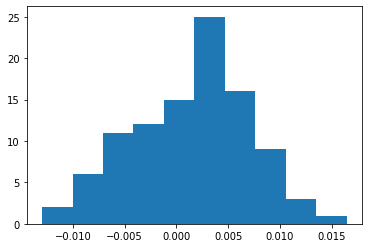

In [ ]:
plt.hist(p_diffs)

In [ ]:
p_diffs=pd.DataFrame(p_diffs)
p_diffs.columns=['mean_of_metric']

In [ ]:
A=p_diffs['mean_of_metric'].quantile(alpha/2)

In [ ]:
B=p_diffs['mean_of_metric'].quantile(1-alpha/2)

In [ ]:
print('Граница доверительного интервала:',A,B)

Граница доверительного интервала: -0.008471471636772693 0.011973960165868928


Вывод: 0 попадает в границы доверительного интервала, из чего делаем вывод, что статестически значимых различий в выборках нет, принимаем нулевую гипотезу